# Data 602 Homework 2 Exploratory Analysis

The objective of this notebook is to perform exploratory analysis on the CDC natality data in order to create a clustering model that can be used to answer my guiding research questions:

1. Using U.S,. Natality data, specifically health metrics and pregnancy outcomes, can we identify hidden groups based on demographic characteristics that would benefit from additional care or consideration during the prenatal period?
2. By examining parental demographics and health metrics, are there hiden groups that have better or poorer natality outcomes? Which indicators best determine these outcomes.

Using CDC natality data from 2019, I hope to answer these questions. 

Plan of action:
- For each of object feature, I will use encoding to conver the feature into numeric format, more appropriate for machine learning models.
- I will visualize the correlation matrix for the data to explore any related attributes.
- I will apply any necessary transformations to the data and engage in feature scaling to prepare the data fo modeling. 
- Some of the feature engineering and selection was performed during cleaning, when the irrelevant features where dropped. I will perform additional feature engineering .
- I will focus on DBSCAN clustering based on my research into which algorithm is best suited to large complext data. I will also test a Kmeans initially to see if any cluster's can be identified. 
- I will perform dimensionality reduction using PCA and visualize the clusters 

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt # for visualizations
import seaborn as sns #for visualizations
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder #encoder for binary and ordered categorical data
from sklearn.preprocessing import OneHotEncoder #encoder for unordered categorical data
from sklearn.compose import ColumnTransformer 
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import time
start_time = time.time()

In [2]:
df1 = pd.read_csv('./NatalityData_cleaned_1.zip', compression = 'zip', low_memory = False)
df2 = pd.read_csv('./NatalityData_cleaned_2.zip', compression = 'zip', low_memory = False)
df3 = pd.read_csv('./NatalityData_cleaned_3.zip', compression = 'zip', low_memory = False)
df4 = pd.read_csv('./NatalityData_cleaned_3.zip', compression = 'zip', low_memory = False)


df= df1.append(df2)
df= df.append(df3)
df= df.append(df4)
df

,Unnamed: 0,Birth Place,Maternal Age,Maternal Nativity,Maternal Residence Status,Maternal Race,Maternal Hispanic Origin,Paternity Acknowledged,Marital Status,Maternal Education,...,Gastroschisis,Limb Reduction Defect,Cleft lip,Cleft Palate,Down Syndrome,Suspected Chromosomal Disorder,Hypospadias,Infant Transferred,Infant Living,Infant Breastfed
0,1,1,40,2,1,10,0,X,1.0,7,...,N,N,N,N,N,N,N,N,Y,Y
1,2,1,30,1,1,3,0,X,1.0,5,...,N,N,N,N,N,N,N,N,Y,Y
2,3,1,25,1,1,1,0,X,1.0,6,...,N,N,N,N,N,N,N,N,Y,Y
3,5,1,30,1,1,6,0,Y,2.0,6,...,N,N,N,N,N,N,N,N,Y,Y
4,6,1,33,1,2,1,0,X,1.0,6,...,N,N,N,N,N,N,N,N,Y,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724412,3241117,1,26,2,4,1,1,X,1.0,5,...,N,N,N,N,N,N,N,N,Y,Y
724413,3241118,1,29,2,1,4,0,X,1.0,6,...,N,N,N,N,N,N,N,N,Y,Y
724414,3241120,1,32,1,2,1,0,X,1.0,4,...,N,N,N,N,N,N,N,N,Y,N
724415,3241121,1,32,1,2,2,0,X,1.0,6,...,N,N,N,N,N,N,N,N,Y,Y


In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
Binary_Categoricals = ['Maternal Nativity','Paternity Acknowledged', 'WIC','Pre-pregnancy Diabetes', 
                      'Gestational Diabetes', 'Pre-pregnancy Hypertension', 'Gestational Hypertension',
                      'Hypertension Eclampsia', 'Previous Preterm Birth','Infertility treatment used', 'Fertility Enhancing Drugs', 
                      'Asst. Reproductive Tech', 'Gonorrhea', 'Syphilis', 'Chlamydia', 'Hep B', 'Hep C',
                      'Successful External Cephalic Version', 'Failed Cephalic Version','Induced Labor', 'Augmented Labor', 
                      'Steroids', 'Antibiotics', 'Chorioamnionitis', 'Anesthesia','If Cesarean, Labor Attempted',
                      'Maternal Transfusion', 'Perineal Laceration', 'Ruptured Uterus', 'Unplanned Hysterectomy',
                      'Maternal admit to ICU', 'Mother Transferred','infant sex','Assisted Ventilation immediately',
                      'Assisted ventilation >6hr', 'Admission to NICU', 'Surffactant', 'Antibiotis for Newborn', 'Seizures',
                      'Anencephaly', 'Spina Bifida', 'Cyanotic Congenital Heart Disease', 'Congenital Diaphragmatic Hernia',
                      'Omphalocele', 'Gastroschisis', 'Limb Reduction Defect', 'Cleft lip', 'Cleft Palate',  'Hypospadias', 'Infant Transferred', 'Infant Living', 'Infant Breastfed']
Ordered_Categoricals = ['Maternal Education','Paternal Education','Month prenatal care Began']
Unordered_Categoricals = ['Birth Place','Marital Status','Maternal Residence Status','Maternal Race','Maternal Hispanic Origin', 
                         'Paternal Race', 'Paternal Hispanic Origin', 'Fetal Presentation at Delivery','Delivery Method',
                         'Attendant at Birth','Payment Source','Down Syndrome', 'Suspected Chromosomal Disorder']
Numeric = ['Maternal Age','Paternal Age','Prior births, now living', 'Prior births, now dead', 'Prior terminations',
          'Interval since last Live Birth (Mo)', 'Number of Prenatal Visits','Daily Cigarette use before Pregnancy', 
           'Daily Cigarette use, 1st Trimester','Daily Cigarette use, 2nd Trimester', 'Daily Cigarette use, 3rd Trimester',
          'BMI', 'Weight Gain', 'Number of Previous Cesareans','5 Minute APGAR', '10 Minute APGAR', 'Plurality (Number of Babies)',
          'Gestation Duration (wks)', 'Birth Weight (g)']

In [5]:
df.shape

(2897669, 87)

In [6]:
#https://datatofish.com/correlation-matrix-pandas/
corrMatrix = df[Numeric+Ordered_Categoricals].corr()
corrMatrix

,Maternal Age,Paternal Age,"Prior births, now living","Prior births, now dead",Prior terminations,Interval since last Live Birth (Mo),Number of Prenatal Visits,Daily Cigarette use before Pregnancy,"Daily Cigarette use, 1st Trimester","Daily Cigarette use, 2nd Trimester",...,Weight Gain,Number of Previous Cesareans,5 Minute APGAR,10 Minute APGAR,Plurality (Number of Babies),Gestation Duration (wks),Birth Weight (g),Maternal Education,Paternal Education,Month prenatal care Began
Maternal Age,1.000000,0.744431,0.320368,0.023926,0.175999,-0.265251,0.075558,-0.064078,-0.045028,-0.035171,...,-0.031701,0.152941,0.010706,0.004804,0.047788,-0.050870,0.043259,0.402273,0.324803,-0.021672
Paternal Age,0.744431,1.000000,0.263538,0.021422,0.137499,-0.225184,0.044474,-0.032446,-0.015162,-0.006475,...,-0.029200,0.123861,0.009769,0.004034,0.039294,-0.038515,0.028663,0.278854,0.258931,-0.010988
"Prior births, now living",0.320368,0.263538,1.000000,0.057896,0.180281,-0.689907,-0.097000,0.036071,0.058090,0.065845,...,-0.109570,0.283507,0.029070,0.009427,0.094520,-0.072984,0.027379,-0.198561,-0.142263,0.024760
"Prior births, now dead",0.023926,0.021422,0.057896,1.000000,0.038970,-0.059949,-0.003502,0.012479,0.014314,0.014944,...,-0.010902,0.038528,-0.004635,-0.001331,0.005399,-0.019201,-0.011783,-0.026043,-0.020078,0.003568
Prior terminations,0.175999,0.137499,0.180281,0.038970,1.000000,-0.137912,0.032746,0.059667,0.059483,0.056128,...,-0.011339,0.080950,-0.005230,-0.003021,0.021202,-0.041441,-0.018994,-0.017224,-0.013236,-0.002496
Interval since last Live Birth (Mo),-0.265251,-0.225184,-0.689907,-0.059949,-0.137912,1.000000,0.053424,-0.019314,-0.039032,-0.045748,...,0.114989,-0.294009,-0.049104,-0.022183,-0.108189,0.066914,-0.057764,0.094294,0.064997,-0.007523
Number of Prenatal Visits,0.075558,0.044474,-0.097000,-0.003502,0.032746,0.053424,1.000000,-0.022835,-0.036960,-0.040410,...,0.059994,-0.019117,0.017624,0.011958,0.020760,0.133990,0.117615,0.141433,0.100752,-0.109605
Daily Cigarette use before Pregnancy,-0.064078,-0.032446,0.036071,0.012479,0.059667,-0.019314,-0.022835,1.000000,0.790631,0.693415,...,0.022954,0.017011,-0.016138,-0.007448,0.000948,-0.014246,-0.058761,-0.148062,-0.120122,0.008608
"Daily Cigarette use, 1st Trimester",-0.045028,-0.015162,0.058090,0.014314,0.059483,-0.039032,-0.036960,0.790631,1.000000,0.872830,...,-0.001561,0.025085,-0.013527,-0.005890,0.000634,-0.019294,-0.067573,-0.136774,-0.108744,0.010294
"Daily Cigarette use, 2nd Trimester",-0.035171,-0.006475,0.065845,0.014944,0.056128,-0.045748,-0.040410,0.693415,0.872830,1.000000,...,-0.011895,0.027616,-0.011974,-0.005036,0.001451,-0.020916,-0.068496,-0.127601,-0.100144,0.009787


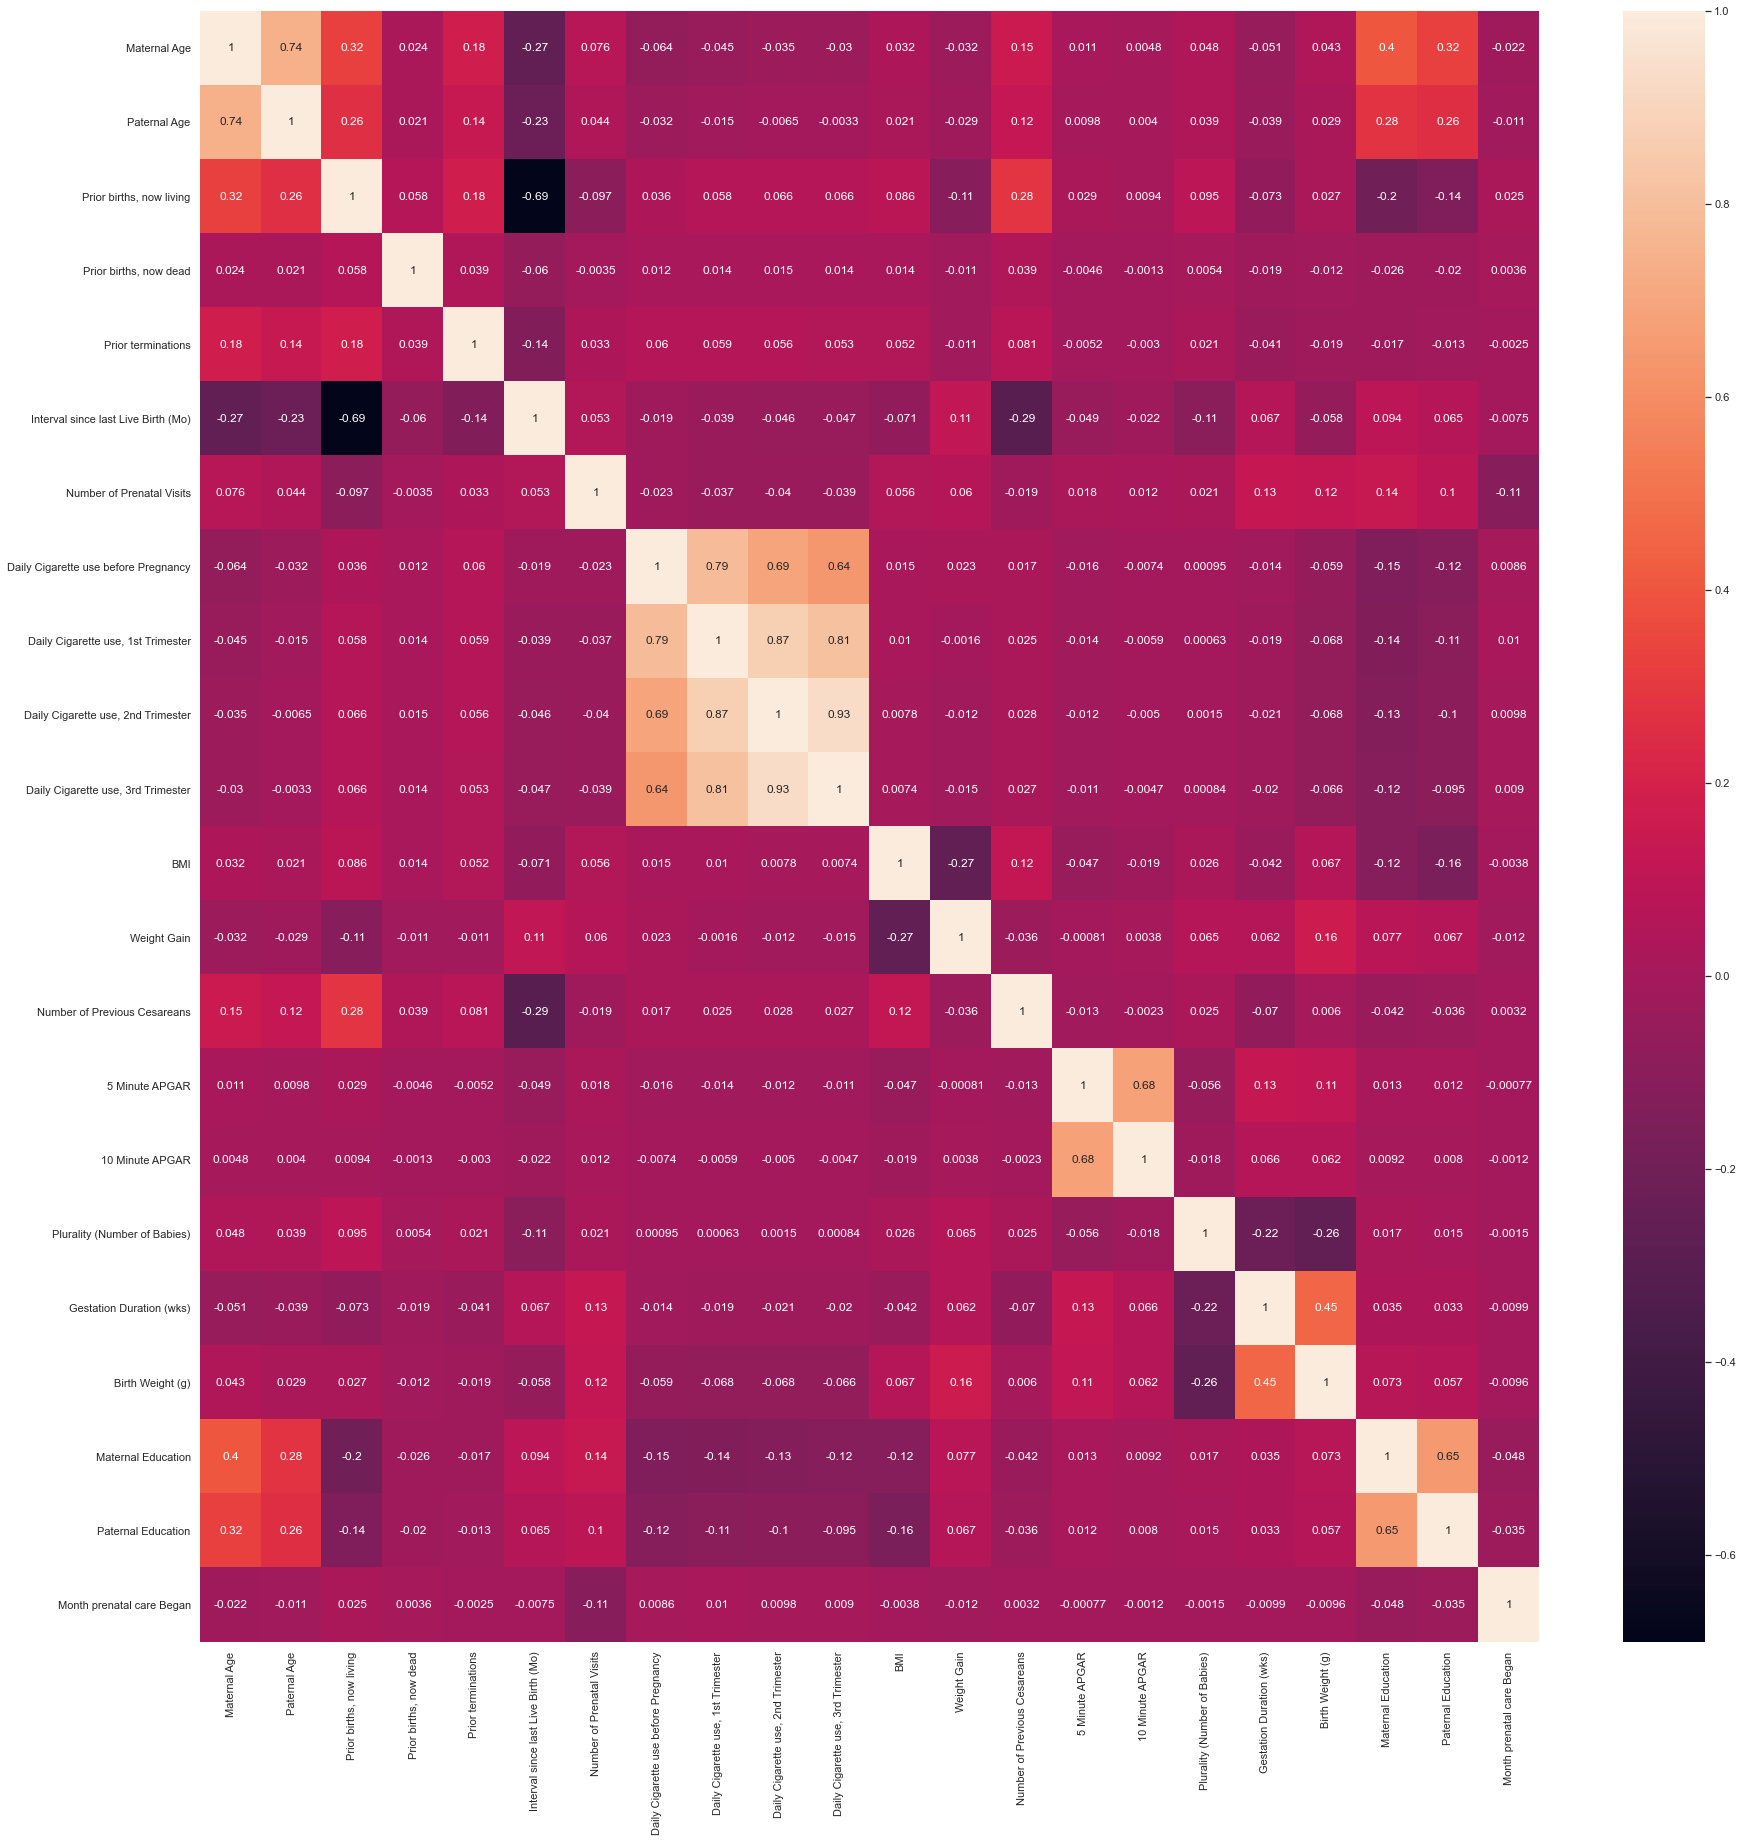

In [7]:
sns.set(rc={'figure.figsize':(30,30)})
sns.heatmap(corrMatrix, annot=True)
plt.show()

Correlated variables with high correlation include cigarette use before pregnancy and use at various trimesters during the pregnancy. Upon closer examination, it looks like cigarette use during the 3rd trimester is negatively correlated with birth weight , duration of pregnancy and the 10 minute APGAR (a measure of newborn health imediately after birth).
I will consider this when performing feature selection, potentially dropping cigarette use before pregnancy and during the 1st and 2nd trimester.

There is a high correlation between age and educational attainment. I will leave them both in for now and consider combining them during feature engineering. 

Prior births now living is very negatively correlated with the amount of time since last live birth. 5 minute APGAR is highly correlated with 10 minute APGAR (As one might expect), meaning only one of these two measures are really necessary to include. I will drop the 10 minute APGAR since this occurs later.

Gestation duration, birth weight, and plurality are all moderately related to eachother, as one might expect. I will consider combining or dropping all but birth weight as outcome indicators. 

Number of Cesarian sections is related to maternal age, number of prior births now living, and negatively correlated with months since last live birth. These relationships are moderate and I will consider them during feature engineering.

In [8]:
dropVars = ['Daily Cigarette use before Pregnancy','Daily Cigarette use, 1st Trimester',
            'Daily Cigarette use, 2nd Trimester','10 Minute APGAR']

df.drop(dropVars, axis =1, inplace = True)

In [9]:
Binary_Categoricals = ['Maternal Nativity','Paternity Acknowledged', 'WIC','Pre-pregnancy Diabetes', 
                      'Gestational Diabetes', 'Pre-pregnancy Hypertension', 'Gestational Hypertension',
                      'Hypertension Eclampsia', 'Previous Preterm Birth','Infertility treatment used', 'Fertility Enhancing Drugs', 
                      'Asst. Reproductive Tech', 'Gonorrhea', 'Syphilis', 'Chlamydia', 'Hep B', 'Hep C',
                      'Successful External Cephalic Version', 'Failed Cephalic Version','Induced Labor', 'Augmented Labor', 
                      'Steroids', 'Antibiotics', 'Chorioamnionitis', 'Anesthesia','If Cesarean, Labor Attempted',
                      'Maternal Transfusion', 'Perineal Laceration', 'Ruptured Uterus', 'Unplanned Hysterectomy',
                      'Maternal admit to ICU', 'Mother Transferred','infant sex','Assisted Ventilation immediately',
                      'Assisted ventilation >6hr', 'Admission to NICU', 'Surffactant', 'Antibiotis for Newborn', 'Seizures',
                      'Anencephaly', 'Spina Bifida', 'Cyanotic Congenital Heart Disease', 'Congenital Diaphragmatic Hernia',
                      'Omphalocele', 'Gastroschisis', 'Limb Reduction Defect', 'Cleft lip', 'Cleft Palate',  'Hypospadias', 'Infant Transferred', 'Infant Living', 'Infant Breastfed']
Ordered_Categoricals = ['Maternal Education','Paternal Education','Month prenatal care Began']
Unordered_Categoricals = ['Birth Place','Marital Status','Maternal Residence Status','Maternal Race','Maternal Hispanic Origin', 
                         'Paternal Race', 'Paternal Hispanic Origin', 'Fetal Presentation at Delivery','Delivery Method',
                         'Attendant at Birth','Payment Source','Down Syndrome', 'Suspected Chromosomal Disorder']
Numeric = ['Maternal Age','Paternal Age','Prior births, now living', 'Prior births, now dead', 'Prior terminations',
          'Interval since last Live Birth (Mo)', 'Number of Prenatal Visits', 'Daily Cigarette use, 3rd Trimester',
          'BMI', 'Weight Gain', 'Number of Previous Cesareans','5 Minute APGAR', 'Plurality (Number of Babies)',
          'Gestation Duration (wks)', 'Birth Weight (g)']

#### Next Step: Feature Encoding

## Note:

Due to processing limitations, I will test methods using a subset of the dataframe first, then train on the whole dataframe in the technical notebook.

In [10]:
df1 = df.sample(frac = 
               .01)

In [11]:
#df=df[Numeric+Ordered_Categoricals]

In [12]:
df1.shape

(28977, 83)

In [13]:
df1.reset_index(drop = True, inplace = True)

In [14]:
#first I will encode the binary and ordered categorical data
le = LabelEncoder()

for i in (Ordered_Categoricals+Binary_Categoricals):
    df1[i] = le.fit_transform(df1[i])


In [15]:
# Bring in function from .py file
%run Functions_HW2.py

In [16]:
ohedf = onehotencoder(df1, Unordered_Categoricals)
ohedf

,Birth Place_1,Birth Place_2,Birth Place_3,Birth Place_4,Birth Place_5,Birth Place_6,Birth Place_7,Marital Status_1.0,Marital Status_2.0,Maternal Residence Status_1,...,Payment Source_5,Payment Source_6,Payment Source_8,Payment Source_9,Down Syndrome_C,Down Syndrome_N,Down Syndrome_P,Suspected Chromosomal Disorder_C,Suspected Chromosomal Disorder_N,Suspected Chromosomal Disorder_P
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28972,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28973,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
28975,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [17]:
df1 = df1.join(ohedf)
df1.drop(Unordered_Categoricals,axis=1,inplace = True) #replacing the unordered categoricals with the encoded data

Okay! My categorical features are encoded. Next I will scale the features before doing running a clustering algorithm on the complete dataset. The main reason to scale data for clustering is so that one feature doesn't inordinately influence the model because of a wider range of data. I will normalize, so that all the data is on a scale from 0 to 1.

In [18]:
scaler = MinMaxScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)

Now I can apply a clustering algorithm to the data and see what is uncovered! I am going to start with a KMeans to see if the data have any obvious clusters, but I think the best algoithm for this will be the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm. DBSCAN uses a threshold epsilon to indicate the neighbors that are considered part of the cluster. DBSCAN corepoints (the center of the cluster) is determined by the least min_sample points (min_sample being the minimum number of neighbors required to be considered a corepoint).

The reason I am focusing on DBSCAN is multimodal:
1. The nature of the data I am using is very large, and the DBSCAN model is capable of handling large datasets efficiently
2. DBSCAN handles noise, and this dataset contains a lot of noise and overlapping groups
3. DBSCAN is able to handle oddly shaped clusters, while other methods, like KMeans, are limited to circular clusters.

Drawbacks of the DBSCAN model are that if the clusters have differing densities, they are not detected well. 

I used information from 
https://www.kdnuggets.com/2019/10/right-clustering-algorithm.html, 
https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/#:~:text=Two%20important%20parameters%20are%20required,neighbors%20within%20%E2%80%9Ceps%E2%80%9D%20radius and 
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc to help me decide on the algorithm to use and to understand the rationale for the DBSCAN model.

In [19]:
from sklearn.cluster import KMeans 
from sklearn import metrics 

C:\Users\15856\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\15856\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\15856\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\15856\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.

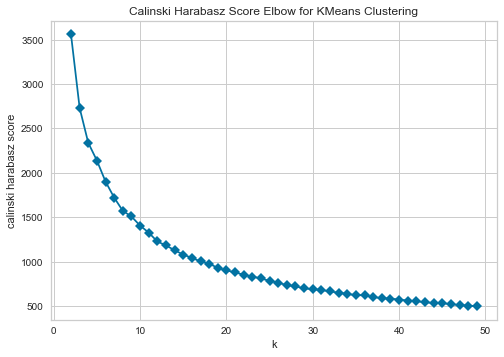

In [20]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2,50), metric = 'calinski_harabasz', timings=False)

visualizer.fit(df_scaled)        # Fit the data to the visualizer
visualizer.show() 

In [21]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [22]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

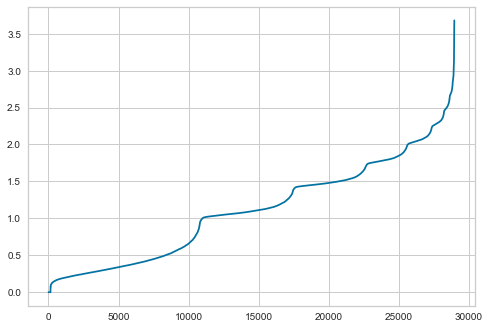

In [23]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [24]:
m = DBSCAN(eps=.3, min_samples=83*2, n_jobs=-1) #Eps should be based on the graph above, but the size means that the function will take a long time to run, so I chose to keep it small, min_samples is base on the rule of thumb minPts = 2·dim
m.fit(df_scaled)

DBSCAN(eps=0.3, min_samples=166, n_jobs=-1)

In [25]:
labels = m.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 0


The above model performed extremely poorly and I suspect that is in part due to the binary variables which are hot encoded and many of which are heavily biased towards 0 (because they indicate rare conditions). Since no clusters were identified, I will attempt to make some adjustments.

I will drop the binary and unordered categoricals and keep only the Numerics (like birth weight, parental aged, etc.) and ordered categoricals (like parental educational attainment). 

In [26]:
df1 = df.sample(frac = 
               .01)
df1.reset_index(drop=True, inplace =True)
df1 = df1[Numeric+Ordered_Categoricals]

In [27]:
le = LabelEncoder()

for i in (Ordered_Categoricals):
    le.fit(df1[i])
    df1[i] = le.transform(df1[i])
df1.head()

,Maternal Age,Paternal Age,"Prior births, now living","Prior births, now dead",Prior terminations,Interval since last Live Birth (Mo),Number of Prenatal Visits,"Daily Cigarette use, 3rd Trimester",BMI,Weight Gain,Number of Previous Cesareans,5 Minute APGAR,Plurality (Number of Babies),Gestation Duration (wks),Birth Weight (g),Maternal Education,Paternal Education,Month prenatal care Began
0,33,34,1,0,0,33,10,0,24.0,15,0,9,1,38,3118,5,6,2
1,28,28,0,0,0,888,12,0,25.2,20,0,9,1,38,2650,5,5,3
2,39,45,1,0,3,182,8,0,37.9,24,1,9,1,40,3365,5,4,6
3,32,32,0,0,0,888,10,0,21.9,39,0,9,1,36,2892,5,4,3
4,32,23,2,0,0,144,11,0,21.0,36,0,9,1,38,2791,2,2,3


In [28]:
#ohedf = onehotencoder(df1, Unordered_Categoricals)
#df2 = df2.join(ohedf)
#df2.drop(Unordered_Categoricals,axis=1,inplace = True) #replacing the unordered categoricals with the encoded data
#df2.drop(Binary_Categoricals, axis=1, inplace = True) #dropping binary categoricals

In [29]:
scaler = MinMaxScaler()
scaler.fit(df1)
df_scaled = scaler.transform(df1)

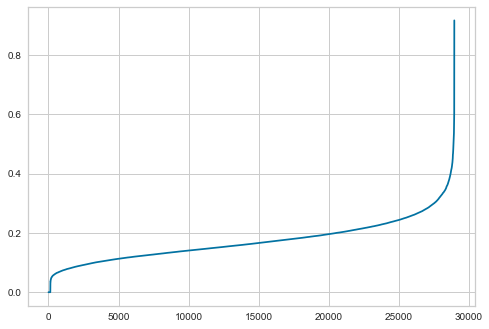

In [30]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [31]:
m = DBSCAN(eps=.3, min_samples=18*2, n_jobs=-1) #Eps is based on the graph above, min_samples is base on the rule of thumb minPts = 2·dim
m.fit(df_scaled)
core_samples_mask = np.zeros_like(m.labels_, dtype=bool)
core_samples_mask[m.core_sample_indices_] = True
labels = m.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df_scaled, labels)) #https://medium.com/@shritam/how-dbscan-algorithm-works-2b5bef80fb3

Estimated number of clusters: 4
Estimated number of noise points: 2787
Silhouette Coefficient: 0.205


In [32]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

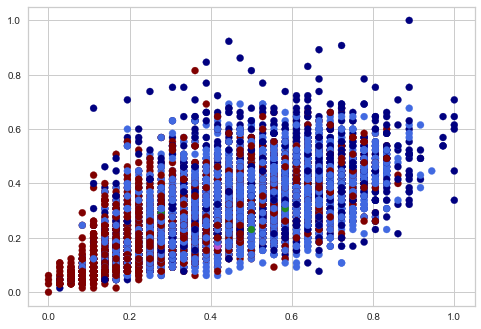

In [33]:
clusters = m.labels_
plt.scatter(df_scaled[:,0], df_scaled[:,1], c=vectorizer(clusters))

This produces a much better model than when the binary variables aren't included!

Next I will use PCA to identify the variables responsible for the majority of the variance in order to reduce the dimensionality of the dataset. I will then proceed with the DBSPAN clustering algorithm.

In [34]:
pca = PCA(n_components=.95)
principal_components = pca.fit_transform(df_scaled)
len(pca.components_)

11

In [35]:
# https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21

principal_df = pd.DataFrame(data = principal_components)
print(principal_df.shape)


(28977, 11)


In [36]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(principal_df)
distances, indices = nbrs.kneighbors(principal_df)

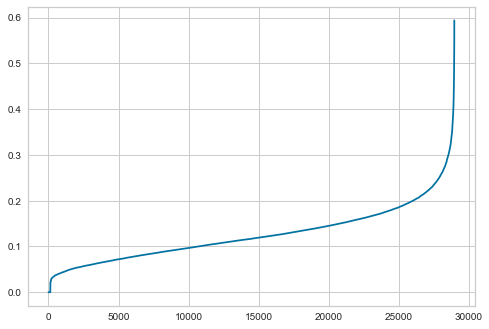

In [37]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [38]:
m = DBSCAN(eps=.25, min_samples=20, n_jobs=-1) #based on the elbow in the plot, eps is set at .25
m.fit(principal_df)

DBSCAN(eps=0.25, min_samples=20, n_jobs=-1)

In [39]:
core_samples_mask = np.zeros_like(m.labels_, dtype=bool)
core_samples_mask[m.core_sample_indices_] = True
labels = m.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(principal_df, labels)) #https://medium.com/@shritam/how-dbscan-algorithm-works-2b5bef80fb3

Estimated number of clusters: 3
Estimated number of noise points: 2139
Silhouette Coefficient: 0.280


Note: the silhouette coeeficient decreased with PCA feature selection and the number of clusters remained the same meaning there was more overelap in clusters when dimensions were removed

In [40]:
clusters = m.labels_

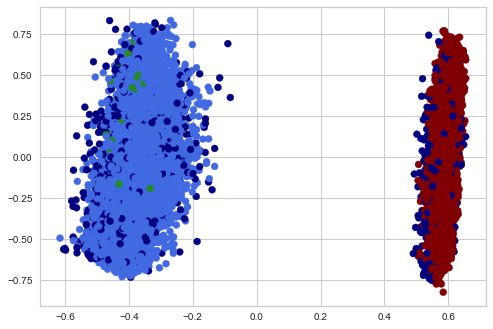

In [41]:
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=vectorizer(clusters))

In [42]:
#Finally, I want to identify some of the characteristics of my clusters:
clusters = m.fit_predict(principal_df)
df1['cluster'] = clusters

In [43]:
clusters_grouped = df1.groupby(by = ['cluster']).median()
#I am only interested in when the clusters are different, so I will drop columns where all the data is the same
clusters_grouped.drop(clusters_grouped.std()[(clusters_grouped.std() == 0)].index, axis=1)

,Maternal Age,Paternal Age,"Prior births, now living",Interval since last Live Birth (Mo),Number of Prenatal Visits,BMI,Weight Gain,Plurality (Number of Babies),Gestation Duration (wks),Birth Weight (g),Maternal Education,Paternal Education,Month prenatal care Began
cluster,,,,,,,,,,,,,
-1,31.0,33.0,1.0,77.0,10.0,29.0,29.0,1.0,38.0,2982.0,3.0,3.0,3.0
0,30.0,32.0,1.0,36.0,12.0,26.2,28.0,1.0,39.0,3374.0,3.0,3.0,3.0
1,27.0,29.0,0.0,888.0,12.0,25.0,31.0,1.0,39.0,3292.0,4.0,3.0,3.0
2,31.0,33.0,1.0,3.0,12.5,25.8,40.0,2.0,37.0,2603.0,5.0,5.0,2.0


In [44]:
pd.set_option('display.max_rows', df1.shape[0]+1)

In [45]:
clusters_grouped = df1.groupby(by = ['cluster']).mean()
#I am only interested in when the clusters are different, so I will drop columns where all the data is the same
clusters_grouped.drop(clusters_grouped.std()[(clusters_grouped.std() == 0)].index, axis=1).T

cluster,-1,0,1,2
Maternal Age,31.075269,30.227259,26.986939,31.146617
Paternal Age,33.918654,32.540260,29.230623,32.868421
"Prior births, now living",1.575503,1.742523,0.000000,1.661654
"Prior births, now dead",0.035998,0.020892,0.000000,0.011278
Prior terminations,1.052828,0.473108,0.247497,0.278195
Interval since last Live Birth (Mo),335.352969,47.815084,888.000000,21.936090
Number of Prenatal Visits,10.137447,11.452590,11.885499,12.996241
"Daily Cigarette use, 3rd Trimester",0.628799,0.445066,0.206979,0.180451
BMI,30.928705,27.484132,26.440948,26.465038
Weight Gain,31.991117,28.067276,32.109067,38.951128


## Conclusions:
After dimensionality reduction, there appear to be 3 clusters in the data. Upon closer analysis of the differences between those clusters, I found that parental age, prior births, birth weight, maternal BMI,and parental education were among the features that most varied among groups. These data can be used to now target those populations most at risk of a negative outcome, for example, the cluster with the highest parental ages also had higher APGAR5 scores, indicating poorer health indicators for the infant after birth.

Additional analysis may be required to tease out the nuances of the groups and discover additional targets for intervension.

Using this project I was able to gain experience applying a clustering algorithm as well as working with a larger, more complex dataset than I am used to. I was able to gain a better understanding of PCA and how to apply it practically, as well as what DBSCAN is, when it is best applied, and how to determine the values for each of the parameters. I feel that I have gained a lot through this project in terms of experience and practice. 

In [46]:
end_time = time.time()

print('Runtime: '+ str((end_time - start_time)/60) + ' minutes')

Runtime: 8.449925263722738 minutes
